# Instrumental Variables and 2 Stage Least Squares Example 1

High Level Overview:
<br>
a) Import Libraries, Import Dataset, EDA
<br>
b) Simulate, set up dataframes which include the equations in the exercise
<br>
c) Add a constant to the dataframe if not given 
<br>
c) Run stats models IV2SLS equation (ex. regout = IV2SLS(df[['y1']], df[['const','y2']],None,None).fit(cov_type='unadjusted')
<br>
d) (Optional) Create covariance and correlation matrix
<br>
e) Regress 1st and 2nd stage using OLS separately or use IV2SLS to execute 2SLS directly
<br>
f) Interpret the results

ϵis and wis are all independent standard normal.

ϵ1 in (1) and (2) is the source of correlation between y2 and the error term ϵ1+ϵ2 for y1.

ϵ3 in (2) and (3) provides the correlation between y2 and z.

\begin{align} y_1 &= 1 -0.1y_2 + \epsilon_1 +\epsilon_2 &(1)\\ y_2 &= w_1 + 0.5\epsilon_1 +\epsilon_3 &(2)\\ z &= w_2 + 1.5\epsilon_3 &(3) \end{align}


ϵis and wis are all independent standard normal.

ϵ1 in (1) and (2) is the source of correlation between y2 and the error term ϵ1+ϵ2 for y1.

ϵ3 in (2) and (3) provides the correlation between y2 and z.

#### a) Import Libraries, Import Dataset, EDA

In [1]:
import pandas as pd
import numpy as np

from statsmodels.api import add_constant
from linearmodels.iv import IV2SLS
import 

from statsmodels.formula.api import ols
import scipy

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from pymatch.Matcher import Matcher
from linearmodels.iv import compare

In this example, we will be using both OLS and 2SLS models to estimate the coefficient of y2 in (1). The true coefficient, as simulated, is -0.1. 

#### b) Simulate, set up dataframes which include the equations in the exercise

In [2]:
ssize = 10000 # sample size
sim_df = pd.DataFrame({'w1': np.random.normal(size = ssize),
                      'w2': np.random.normal(size = ssize),
                      'e1': np.random.normal(size = ssize),
                      'e2': np.random.normal(size = ssize),
                      'e3': np.random.normal(size = ssize)})

In [3]:
#Set up equations mentioned in introduction - We will do the same for our projects
sim_df['z'] = sim_df['w2'] + 1.5*sim_df['e3']
sim_df['y2'] = sim_df['w1'] + 0.5*sim_df['e1'] + sim_df['e3']
sim_df['y1'] = 1 - 0.1*sim_df['y2'] + sim_df['e1'] + sim_df['e2']

#### c) Add a constant to the dataframe if not given

In [4]:
#Add Constant for our dataframe
sim_df = add_constant(sim_df, has_constant='add')

sim_df.head()


,const,w1,w2,e1,e2,e3,z,y2,y1
0,1.0,-0.011382,1.181603,0.580321,0.437343,1.311243,3.148468,1.590022,1.858662
1,1.0,0.347016,0.566792,0.560413,0.065333,0.924659,1.953781,1.551882,1.470558
2,1.0,-1.421187,-0.539496,-0.398986,1.644376,0.144320,-0.323016,-1.476360,2.393025
3,1.0,0.498914,0.484196,-0.568256,-0.577944,2.466243,4.183561,2.681029,-0.414303
4,1.0,0.590457,0.883142,1.718620,1.286363,0.173872,1.143950,1.623639,3.842619


#### c) Run stats models IV2SLS equation

Here we use IV2SLS' function to model OLS by setting 'endog' and 'instruments' parameters to 'None'

In [5]:
regout = IV2SLS(sim_df[['y1']], sim_df[['const','y2']], None, None).fit(cov_type='unadjusted')
regout

OLS Estimation Summary                            
==============================================================================
Dep. Variable:                     y1   R-squared:                      0.0180
Estimator:                        OLS   Adj. R-squared:                 0.0179
No. Observations:               10000   F-statistic:                    182.93
Date:                Thu, Nov 04 2021   P-value (F-stat)                0.0000
Time:                        17:50:59   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          1.0028     0.0138     72.882     0.0000      0.9759      1.0298
y2             0.1245     0.0092     13.525     0.0000      0.1065      0.1426
==============================================================================
OLSResults, id: 0x2274c1ced90

#### d) (Optional) Create covariance and correlation matrix

In [6]:
sim_df['res'] = regout.resids
cov_y2res = np.cov(sim_df['y2'],sim_df['res'])
cov_y2res

array([[2.23360545e+00, 1.66105975e-17],
       [1.66105975e-17, 1.89337186e+00]])

In [7]:
cor_y2res = np.corrcoef(sim_df['y2'],sim_df['res'])
cor_y2res

array([[1.00000000e+00, 8.07726006e-18],
       [8.07726006e-18, 1.00000000e+00]])

#### e) Regress 1st and 2nd stage using OLS separately ...

In [8]:
stage1 = IV2SLS(sim_df[['y2']], sim_df[['const','z']], None, None).fit(cov_type='unadjusted')
stage1

OLS Estimation Summary                            
==============================================================================
Dep. Variable:                     y2   R-squared:                      0.3124
Estimator:                        OLS   Adj. R-squared:                 0.3123
No. Observations:               10000   F-statistic:                    4542.5
Date:                Thu, Nov 04 2021   P-value (F-stat)                0.0000
Time:                        17:50:59   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const         -0.0023     0.0124    -0.1817     0.8558     -0.0265      0.0220
z              0.4656     0.0069     67.398     0.0000      0.4521      0.4791
==============================================================================
OLSResults, id: 0x2274ce17820

In [9]:
X = pd.DataFrame({'const':sim_df.const, 'yhat' : stage1.fitted_values.values[:,0]})
stage2 = IV2SLS(sim_df[['y1']], X, None, None).fit(cov_type='unadjusted')
stage2

OLS Estimation Summary                            
==============================================================================
Dep. Variable:                     y1   R-squared:                      0.0028
Estimator:                        OLS   Adj. R-squared:                 0.0027
No. Observations:               10000   F-statistic:                    27.728
Date:                Thu, Nov 04 2021   P-value (F-stat)                0.0000
Time:                        17:50:59   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          1.0057     0.0139     72.526     0.0000      0.9786      1.0329
yhat          -0.0874     0.0166    -5.2658     0.0000     -0.1200     -0.0549
==============================================================================
OLSResults, id: 0x2274cfc7ac0

#### ...or use IV2SLS to execute 2SLS directly

In [10]:
regout1 = IV2SLS(sim_df[['y1']], sim_df[['const']], sim_df[['y2']], sim_df[['z']]).fit(cov_type='unadjusted')
regout1

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                     y1   R-squared:                     -0.0341
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0342
No. Observations:               10000   F-statistic:                    26.741
Date:                Thu, Nov 04 2021   P-value (F-stat)                0.0000
Time:                        17:50:59   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          1.0057     0.0141     71.222     0.0000      0.9781      1.0334
y2            -0.0874     0.0169    -5.1711     0.0000     -0.1205     -0.0543
==============================================================================

Endogenous: y2
Instruments: z
Unadjusted Covariance (Homoskedastic)
Debiased: False
IVResults, id: 0x2274cfcdf10

#### f) Interpret the results

Focus on p-value, F-statistic and R^2 Value: https://www.statsmodels.org/dev/generated/statsmodels.sandbox.regression.gmm.IV2SLS.html

# Instrumental Variables and 2 Stage Least Squares Example 2: Wages

High Level Overview:
<br>
a) Import Libraries, Import Dataset, EDA
<br>
b) Calculate Reduced Forms for Wage and Hours
<br>
c) Set up structural form OLS regression
<br>
d) Direct two stage least squares with diagnostic tests

#### a) Import Libraries, Import Dataset, EDA

In [11]:
married_women = pd.read_excel(r'Example1.xls')
married_women.head()

,MARITAL,UHOURS,ln(hours),EARNHRE,AGE,NKIDS,KID3DIFF,ln(earn),Unnamed: 8,Unnamed: 9
0,1,20,2.995732,400,25,2,0,5.991465,NaN,Data set is married women in CA for the
1,1,20,2.995732,1600,25,2,0,7.377759,NaN,1980 Long Form of the Decennial Census.
2,1,40,3.688879,540,25,2,0,6.291569,NaN,UHOURS=usual hours
3,1,40,3.688879,350,25,2,0,5.857933,NaN,EARNHRE=hourly earnings
4,1,40,3.688879,485,25,2,0,6.184149,NaN,AGE=age of respondent


In [12]:
#Drop Unnamed
married_women = married_women.drop(columns=['Unnamed: 8', 'Unnamed: 9'])

In [13]:
#Normalize Data Distribution for Wage and Hours
married_women['ln_earn'] = np.log(married_women['EARNHRE']) 
married_women['ln_hours'] = np.log(married_women['UHOURS'])

In [14]:
married_women.head()

,MARITAL,UHOURS,ln(hours),EARNHRE,AGE,NKIDS,KID3DIFF,ln(earn),ln_earn,ln_hours
0,1,20,2.995732,400,25,2,0,5.991465,5.991465,2.995732
1,1,20,2.995732,1600,25,2,0,7.377759,7.377759,2.995732
2,1,40,3.688879,540,25,2,0,6.291569,6.291569,3.688879
3,1,40,3.688879,350,25,2,0,5.857933,5.857933,3.688879
4,1,40,3.688879,485,25,2,0,6.184149,6.184149,3.688879


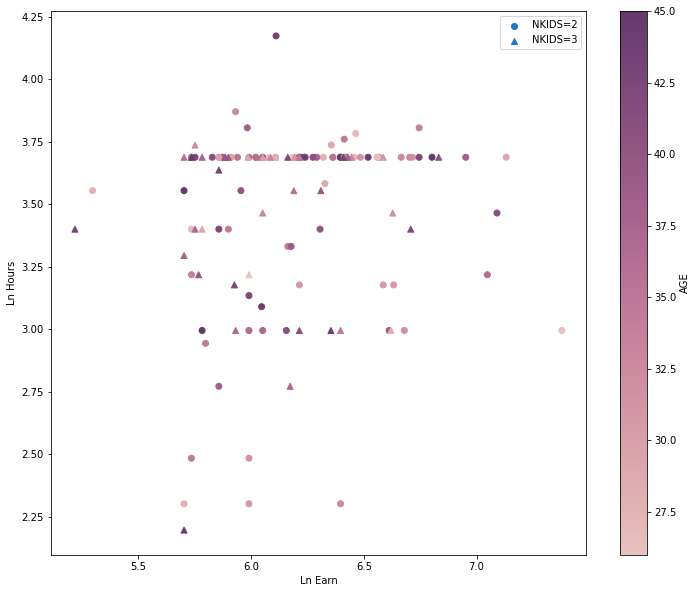

In [15]:
### Optional Plot - Only if required - Still Part of a
plt.figure(figsize=(12,10))
marker_dict = {2.0:'o',3.0:'^'}
groups  = married_women.groupby('NKIDS')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

for name, group in groups:
    plt.scatter(group['ln_earn'], group['ln_hours'], c = group.AGE, cmap = cmap,marker=marker_dict[name],label = 'NKIDS=' + str(name))
cbar = plt.colorbar()
cbar.set_label('AGE')
plt.xlabel('Ln Earn')
plt.ylabel('Ln Hours')
plt.legend()

#### b) Calculate Reduced Form for Wage

In [16]:
wage_reduced_form = ols('ln_earn ~ NKIDS + AGE', married_women).fit()
wage_reduced_form.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.015   
Dependent Variable: ln_earn          AIC:                111.3985
Date:               2021-11-04 17:51 BIC:                119.9074
No. Observations:   126              Log-Likelihood:     -52.699 
Df Model:           2                F-statistic:        1.967   
Df Residuals:       123              Prob (F-statistic): 0.144   
R-squared:          0.031            Scale:              0.13844 
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       6.5887    0.2379  27.6938  0.0000   6.1177  7.0596
NKIDS          -0.1264    0.0707  -1.7890  0.0761  -0.2663  0.0135
AGE            -0.0032    0.0055  -0.5847  0.5598  -0.0142  0.0077
-----------------------------------------------------------------
Omnibus:              4.067        Durbin-Watson:           2.141
Prob(Omnibus):        0.131        Jarque-Bera (JB):        3.658
Skew:                 0.411        Prob(JB):                0.161
Kurtosis:             3.143        Condition No.:           260  
=================================================================

"""

#### b) Calculate Reduced Form for Hours

In [17]:
hours_reduced_form = ols('ln_hours ~ NKIDS + AGE', married_women).fit()
hours_reduced_form.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.016  
Dependent Variable: ln_hours         AIC:                112.4325
Date:               2021-11-04 17:51 BIC:                120.9413
No. Observations:   126              Log-Likelihood:     -53.216 
Df Model:           2                F-statistic:        0.01528 
Df Residuals:       123              Prob (F-statistic): 0.985   
R-squared:          0.000            Scale:              0.13959 
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       3.4803    0.2389  14.5688  0.0000   3.0075  3.9532
NKIDS           0.0062    0.0710   0.0867  0.9310  -0.1343  0.1466
AGE            -0.0009    0.0056  -0.1629  0.8709  -0.0119  0.0101
-----------------------------------------------------------------
Omnibus:              40.186       Durbin-Watson:          2.147 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       68.121
Skew:                 -1.512       Prob(JB):               0.000 
Kurtosis:             4.956        Condition No.:          260   
=================================================================

"""

#### c) Set up structural form OLS regression

In [18]:
structural_form = ols('ln_hours ~ ln_earn', married_women).fit()
structural_form.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.006   
Dependent Variable: ln_hours         AIC:                108.6615
Date:               2021-11-04 17:51 BIC:                114.3341
No. Observations:   126              Log-Likelihood:     -52.331 
Df Model:           1                F-statistic:        1.786   
Df Residuals:       124              Prob (F-statistic): 0.184   
R-squared:          0.014            Scale:              0.13653 
-------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept    2.7351     0.5457   5.0124   0.0000    1.6551   3.8151
ln_earn      0.1178     0.0881   1.3366   0.1838   -0.0566   0.2923
-----------------------------------------------------------------
Omnibus:              37.319       Durbin-Watson:          2.144 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       59.636
Skew:                 -1.454       Prob(JB):               0.000 
Kurtosis:             4.704        Condition No.:          105   
=================================================================

"""

#### d) Direct two stage least squares with diagnostic tests (Wu & Hausmann)

In [19]:
married_women = add_constant(married_women, has_constant='add')

direct_2SLS_form = IV2SLS(married_women[['ln_hours']], married_women[['const']]
                          , married_women[['ln_earn']], married_women[['NKIDS','AGE']]).fit(cov_type='unadjusted')

direct_2SLS_form

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:               ln_hours   R-squared:                     -0.0016
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0097
No. Observations:                 126   F-statistic:                    0.0002
Date:                Thu, Nov 04 2021   P-value (F-stat)                0.9898
Time:                        17:51:01   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          3.5028     3.0942     1.1320     0.2576     -2.5618      9.5673
ln_earn       -0.0064     0.5007    -0.0128     0.9898     -0.9878      0.9749
==============================================================================

Endogenous: ln_earn
Instruments: NKIDS, AGE
Unadjusted Covariance (Homoskedastic)
Debiased: False
IVResults, id: 0x2274e471a00

In [20]:
direct_2SLS_form.wooldridge_regression

Wooldridge's regression test of exogeneity
H0: Endogenous variables are exogenous
Statistic: 0.0646
P-value: 0.7994
Distributed: chi2(1)
WaldTestStatistic, id: 0x2274e490ac0

In [21]:
direct_2SLS_form.wu_hausman()

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 0.0701
P-value: 0.7916
Distributed: F(1,123)
WaldTestStatistic, id: 0x2274e3231f0

## Example 3:Instrumental Variables in Return of Education for Married Women

To better understand instrumental variables, lets consider the most basic model:

### $y = \beta_0 + \beta_1*x + u$

The OLS estimator for the slope parameter is:

###  $\hat{\beta_1} = \frac{Cov(x,y)}{Var(x)}$

Suppose regressor $x$ is correlated with the error term $u$, so that OLS parameter estimators will be biased and inconsistent. If we have a valid variable $z$, we can consistently estimate $\beta_1$ using the IV estimator:

###  $\hat{\beta_1}(iv) = \frac{Cov(z,y)}{Cov(z,x)}$

A valid instrument is correlatedd with regressor x (relevant) so that the denominator of the Equation 15.2 is nonzero (it also also uncorrelated with error term u)

In this example we are trying to estimate return on education for married women. As an instrumental variable for education we use the fathers education (fatheduc). 

1. First we calculate OLS and IV slope parameters 
2. then full OLS and IV estimates are calculated using the boxed routines ols and IV2SLS.

In [33]:
#import dataset
import wooldridge as woo
import linearmodels.iv as iv
mroz = woo.dataWoo('mroz')
mroz.head(5)

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040.0,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300.0,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300.0,0.6215,12,14,9.5,1,7,20.100058,1.524272,49


In [30]:
#restrict to non-missing wage observations:
mroz = mroz.dropna(subset=['lwage'])

In [31]:
#Add variables for the equation
cov_yz = np.cov(mroz['lwage'], mroz['fatheduc'])[1,0]
cov_xy = np.cov(mroz['educ'], mroz['lwage'])[1,0]
cov_xz = np.cov(mroz['educ'], mroz['fatheduc'])[1,0]
var_x = np.var(mroz['educ'], ddof=1)
x_bar = np.mean(mroz['educ'])
y_bar = np.mean(mroz['lwage'])

In [32]:
# OLS Slope paremeter manually:
b_ols_man = cov_xy / var_x
print(f'b_ols_man: {b_ols_man}\n')

#IV Slope parameter manually:
b_iv_man = cov_yz / cov_xz
print(f'b_iv_man: {b_iv_man}\n')

b_ols_man: 0.10864865517467516

b_iv_man: 0.05917347999936596



In [37]:
import statsmodels.formula.api as smf

#OLS automatically
reg_ols = smf.ols(formula='np.log(wage) ~ educ', data = mroz)
results_ols = reg_ols.fit()

#IV automatically- slight variation of previous example
reg_iv = iv.IV2SLS.from_formula(formula='np.log(wage) ~ 1 + [educ ~ fatheduc]',data = mroz)
results_iv = reg_iv.fit(cov_type='unadjusted', debiased=True)

In [40]:
#Print both tables results
#Table OLS

#print OLS regression table:
table_ols = pd.DataFrame({'b': round(results_ols.params, 2),
                      'se': round(results_ols.bse, 2),
                      't': round(results_ols.tvalues, 2),
                      'pval': round(results_ols.pvalues, 2) })
print(f'table_ols: \n{table_ols}\n')

#print IV regression table:
table_iv = pd.DataFrame({'b': round(results_iv.params, 2),
                      'se': round(results_iv.std_errors, 2),
                      't': round(results_iv.tstats, 2),
                      'pval': round(results_iv.pvalues, 2) })
print(f'table_iv: \n{table_iv}\n')

table_ols: 
              b    se     t  pval
Intercept -0.19  0.19 -1.00  0.32
educ       0.11  0.01  7.55  0.00

table_iv: 
              b    se     t  pval
Intercept  0.44  0.45  0.99  0.32
educ       0.06  0.04  1.68  0.09



### Two Stage Least Squares

2SLS is a general approach for IV estimation when we have one or more endogenous regressors and at least as many additional variables. F.ex consider: 

#### $y_1 = \beta_0 + \beta_1*y_2 + \beta_2*y_3 + \beta_3*z_1 + \beta_4*z_2 + u_1$

The regressors y2 and y3 are potentially correlated with error term u1, the regressors z1, z2 and z3 are assumed exogenous. Because we have two endogenous regressors, we will need at least two additional instrumental variables, say z4 and z5.

The name of 2SLS comes from the fact that it is performed in the following 2 stages of OLS regressions:

1. Separately regress y2 and y3 on z1 through z5. Obtain fitted values $\hat{y_2}$ and $\hat{y_3}$
2. Regress $y_1$ on $\hat{y_2}$ , $\hat{y_3}$ and $z_1$ through $z_3$

If the instruments are valid , this will give consistent estimates of the parameters $\beta_0$ through $\beta_5$. 
Generalizing this to more endogenous regressors and instrumental is obvious. 

Lets continue with the example elaborated on married women and return on education

In [41]:
#Import dataset
mroz = woo.dataWoo('mroz')

In [42]:
#Restrict to non-missing wage observations:
mroz = mroz.dropna(subset=['lwage'])

In [44]:
#1st Stage (Reduced Form): 
reg_redf = smf.ols(formula='educ ~ exper + I(exper**2) + motheduc + fatheduc',
                   data=mroz)
results_redf = reg_redf.fit()

mroz['educ_fitted'] = results_redf.fittedvalues

#print 1st stage regression table:
table_redf = pd.DataFrame({'b': round(results_redf.params, 2),
                      'se': round(results_redf.bse, 2),
                      't': round(results_redf.tvalues, 2),
                      'pval': round(results_redf.pvalues, 2) })
print(f'table_redf: \n{table_redf}\n')

table_redf: 
                  b    se      t  pval
Intercept      9.10  0.43  21.34  0.00
exper          0.05  0.04   1.12  0.26
I(exper ** 2) -0.00  0.00  -0.84  0.40
motheduc       0.16  0.04   4.39  0.00
fatheduc       0.19  0.03   5.62  0.00



In [46]:
#2nd Stage: 
reg_secstg = smf.ols(formula='np.log(wage) ~ educ_fitted + exper + I(exper**2)',
                   data=mroz)
results_secstg = reg_secstg.fit()

#print 2nd stage regression table:
table_secstg = pd.DataFrame({'b': round(results_secstg.params, 2),
                      'se': round(results_secstg.bse, 2),
                      't': round(results_secstg.tvalues, 2),
                      'pval': round(results_secstg.pvalues, 2) })
print(f'table_secstg: \n{table_secstg}\n')

table_secstg: 
                  b    se     t  pval
Intercept      0.05  0.42  0.11  0.91
educ_fitted    0.06  0.03  1.86  0.06
exper          0.04  0.01  3.14  0.00
I(exper ** 2) -0.00  0.00 -2.13  0.03



# Difference in Differences Example 1

High Level Overview:
<br>
a) Import Libraries, Import Dataset, EDA
<br>
b) Create a dummy variable to indicate the time when the treatment started.
<br>
c) Create second dummy variable to identify which groups were exposed to the treatment
<br>
d) Perform OLS regression; (add the interaction term in the regression formula)
<br>
e) Interpret coefficient for the difference-in-difference estimator

#### a) Import Libraries, Import Dataset, EDA

In [53]:
df = pd.read_stata("http://dss.princeton.edu/training/Panel101.dta")
df.head()

,country,year,y,y_bin,x1,x2,x3,opinion,op
0,A,1990,1.342788e+09,1.0,0.277904,-1.107956,0.282554,Str agree,1.0
1,A,1991,-1.899661e+09,0.0,0.320685,-0.948720,0.492538,Disag,0.0
2,A,1992,-1.123436e+07,0.0,0.363466,-0.789484,0.702523,Disag,0.0
3,A,1993,2.645775e+09,1.0,0.246144,-0.885533,-0.094391,Disag,0.0
4,A,1994,3.008335e+09,1.0,0.424623,-0.729768,0.946131,Disag,0.0


#### b) Create a dummy variable to indicate the time when the treatment started.

In [54]:
df['time'] = np.where(df['year'] < 1994, 0, 1)
df.head(3)

,country,year,y,y_bin,x1,x2,x3,opinion,op,time
0,A,1990,1.342788e+09,1.0,0.277904,-1.107956,0.282554,Str agree,1.0,0
1,A,1991,-1.899661e+09,0.0,0.320685,-0.948720,0.492538,Disag,0.0,0
2,A,1992,-1.123436e+07,0.0,0.363466,-0.789484,0.702523,Disag,0.0,0


#### c) Create second dummy variable to identify which groups were exposed to the treatment

In [55]:
df['treated'] = np.where((df['country'] == 'E') | (df['country'] == 'F') | (df['country'] == 'G'), 1, 0)
df.iloc[38:41,:]

,country,year,y,y_bin,x1,x2,x3,opinion,op,time,treated
38,D,1998,1.850565e+09,1.0,0.232204,1.595302,0.072475,Disag,0.0,1,0
39,D,1999,-2.025477e+09,0.0,-0.079989,1.704797,0.558433,Str agree,1.0,1,0
40,E,1990,1.342788e+09,1.0,0.452867,1.728403,0.597058,Str disag,0.0,0,1


#### d) Perform OLS regression; (add the interaction term in the regression formula)

In [56]:
regout = ols('y ~ treated + time + treated*time', df).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Ordinary least squares
=============================================================================================
Model:                        OLS                      Adj. R-squared:             0.041     
Dependent Variable:           y                        AIC:                        3255.3682 
Date:                         2021-11-04 15:05         BIC:                        3264.3622 
No. Observations:             70                       Log-Likelihood:             -1623.7   
Df Model:                     3                        F-statistic:                1.984     
Df Residuals:                 66                       Prob (F-statistic):         0.125     
R-squared:                    0.083                    Scale:                      8.7181e+18
---------------------------------------------------------------------------------------------
                  Coef.           Std.Err.       t    P>|t|       [0.025           0.975]    
---------------------------------------------------------------------------------------------
Intercept      358143950.1250  738162503.0708  0.4852 0.6292 -1115645038.4734 1831932938.7234
treated       1775969672.5417 1127561848.5001  1.5751 0.1200  -475280193.6732 4027219538.7565
time          2289454650.5417  952963693.7294  2.4025 0.0191   386801247.6532 4192108053.4302
treated:time -2519511629.6528 1455676087.0199 -1.7308 0.0882 -5425862709.6534  386839450.3479
---------------------------------------------------------------------------------------------
Omnibus:                       6.182                  Durbin-Watson:                    1.615
Prob(Omnibus):                 0.045                  Jarque-Bera (JB):                 7.779
Skew:                          -0.304                 Prob(JB):                         0.020
Kurtosis:                      4.516                  Condition No.:                    7    
=============================================================================================

"""

#### e) Interpret coefficient for the difference-in-difference estimator

The coefficient for 'treated:time' is the difference-in-difference estimator. In this example, the difference-in-difference has a negative effect that is significant at a 10% level of significance.

# Difference in Differences Example 2

### Garbage Incinerator Example from Book

In [69]:
#Import Dataset
kielmc = woo.dataWoo('kielmc')
kielmc.head(5)

,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,area,...,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
0,1978,48,2304.0,4,3000.0,1000.0,6.9078,60000.0,7,1660,...,11.002100,0,7.414573,8.429017,0.0,47.717705,1,0,60000.0,11.002100
1,1978,83,6889.0,4,4000.0,1000.0,6.9078,40000.0,6,2612,...,10.596635,0,7.867871,9.032409,0.0,47.717705,1,0,40000.0,10.596635
2,1978,58,3364.0,4,4000.0,1000.0,6.9078,34000.0,6,1144,...,10.434115,0,7.042286,8.517193,0.0,47.717705,1,0,34000.0,10.434115
3,1978,11,121.0,4,4000.0,1000.0,6.9078,63900.0,5,1136,...,11.065075,0,7.035269,9.210340,0.0,47.717705,1,0,63900.0,11.065075
4,1978,48,2304.0,4,4000.0,2000.0,7.6009,44000.0,5,1868,...,10.691945,0,7.532624,9.210340,0.0,57.773682,1,0,44000.0,10.691945


In [70]:
#Separate Regressions for 1978 and 1981:
y78 = (kielmc['year'] == 1978)
reg78 = smf.ols(formula='rprice ~ nearinc',data=kielmc, subset=y78)
results78 = reg78.fit()

In [71]:
y81 = (kielmc['year'] == 1981)
reg81 = smf.ols(formula='rprice ~ nearinc',data=kielmc, subset=y81)
results81 = reg81.fit()

In [72]:
# Joint regression including interaction term:
reg_joint = smf.ols(formula='rprice ~ nearinc * C(year)', data=kielmc)
results_joint = reg_joint.fit()

In [76]:
#print all abovementioned regression tables
#table 1978
table_78 = pd.DataFrame({'b': round(results78.params , 2),
                         'se': round(results78.bse, 2),
                         't': round(results78.tvalues, 2), 
                         'pval': round (results78.pvalues, 2)})
print(f'table_78: \n{table_78}\n')

#table 1981
table_81 = pd.DataFrame({'b': round(results81.params , 2),
                         'se': round(results81.bse, 2),
                         't': round(results81.tvalues, 2), 
                         'pval': round (results81.pvalues, 2)})
print(f'table_81: \n{table_81}\n')

#joint parameters table
table_joint = pd.DataFrame({'b': round(results_joint.params , 2),
                         'se': round(results_joint.bse, 2),
                         't': round(results_joint.tvalues, 2), 
                         'pval': round (results_joint.pvalues, 2)})
print(f'table_joint: \n{table_joint}\n')

table_78: 
                  b       se      t  pval
Intercept  82517.23  2653.79  31.09   0.0
nearinc   -18824.37  4744.59  -3.97   0.0

table_81: 
                   b       se      t  pval
Intercept  101307.51  3093.03  32.75   0.0
nearinc    -30688.27  5827.71  -5.27   0.0

table_joint: 
                                b       se      t  pval
Intercept                82517.23  2726.91  30.26  0.00
C(year)[T.1981]          18790.29  4050.06   4.64  0.00
nearinc                 -18824.37  4875.32  -3.86  0.00
nearinc:C(year)[T.1981] -11863.90  7456.65  -1.59  0.11



### Now we run the difference in differences model

In [77]:
#difference in differences (DiD):
reg_did = smf.ols(formula='np.log(rprice) ~ nearinc*C(year)', data=kielmc)
results_did = reg_did.fit()

In [78]:
#print regression table:
table_did = pd.DataFrame({'b': round(results_did.params , 2),
                         'se': round(results_did.bse, 2),
                         't': round(results_did.tvalues, 2), 
                         'pval': round (results_did.pvalues, 2)})
print(f'table_did: \n{table_did}\n')

table_did: 
                             b    se       t  pval
Intercept                11.29  0.03  369.84  0.00
C(year)[T.1981]           0.19  0.05    4.26  0.00
nearinc                  -0.34  0.05   -6.23  0.00
nearinc:C(year)[T.1981]  -0.06  0.08   -0.75  0.45



In [79]:
#Did with control variables:
reg_didC = smf.ols(formula='np.log(rprice) ~ nearinc*C(year) + age + I(age**2) + np.log(intst) + np.log(land) + np.log(area) + rooms + baths', data=kielmc)
results_didC = reg_didC.fit()

In [80]:
#print regression table:
table_didC = pd.DataFrame({'b': round(results_didC.params , 2),
                         'se': round(results_didC.bse, 2),
                         't': round(results_didC.tvalues, 2), 
                         'pval': round (results_didC.pvalues, 2)})
print(f'table_didC: \n{table_didC}\n')

table_didC: 
                            b    se      t  pval
Intercept                7.65  0.42  18.40  0.00
C(year)[T.1981]          0.16  0.03   5.69  0.00
nearinc                  0.03  0.05   0.68  0.50
nearinc:C(year)[T.1981] -0.13  0.05  -2.53  0.01
age                     -0.01  0.00  -5.92  0.00
I(age ** 2)              0.00  0.00   4.34  0.00
np.log(intst)           -0.06  0.03  -1.95  0.05
np.log(land)             0.10  0.02   4.08  0.00
np.log(area)             0.35  0.05   6.81  0.00
rooms                    0.05  0.02   2.73  0.01
baths                    0.09  0.03   3.40  0.00



# Pooled Cross Sections Example

### Wooldrige Changes to the return of education and the gender wage cap

The dataset cps78_85 includes two pooled cross-sections for the years 1978 and 1985. The dummy variable y85 is equal to 1 for observations in 1985, and to 0 for 1978. We estimate a model for the low wage lwage, of the form

$lwage = \beta_o + \delta_0*y85 + \beta_1 * educ + \delta_1(y85*educ) + \beta_2*exper + \beta_3*{exper^2 / 100} + \beta_4*union + \beta_5*female + \delta_5*(y85*female) + u$

In [57]:
import wooldridge as woo
import statsmodels.formula.api as smf

In [60]:
cps78_85 = woo.dataWoo('cps78_85')
cps78_85.head(3)

,educ,south,nonwhite,female,married,exper,expersq,union,lwage,age,year,y85,y85fem,y85educ,y85union
0,12,0,0,0,0,8,64,0,1.2150,25,78,0,0,0,0
1,12,0,0,1,1,30,900,1,1.6094,47,78,0,0,0,0
2,6,0,0,0,1,38,1444,1,2.1401,49,78,0,0,0,0


In [65]:
#OLS results including interaction terms:
reg = smf.ols(formula='lwage ~ y85 * (educ+female) + exper + I((exper**2)/100) + union',
             data=cps78_85)

results = reg.fit()

In [66]:
#print regression table:
table = pd.DataFrame({'b': round(results.params, 2),
                      'se': round(results.bse, 2),
                      't': round(results.tvalues, 2),
                      'pval': round(results.pvalues, 2) })
print(f'table: \n{table}\n')

table: 
                          b    se      t  pval
Intercept              0.46  0.09   4.91  0.00
y85                    0.12  0.12   0.95  0.34
educ                   0.07  0.01  11.19  0.00
female                -0.32  0.04  -8.65  0.00
y85:educ               0.02  0.01   1.97  0.05
y85:female             0.09  0.05   1.66  0.10
exper                  0.03  0.00   8.29  0.00
I((exper ** 2) / 100) -0.04  0.01  -5.15  0.00
union                  0.20  0.03   6.67  0.00



# Propensity Score Matching Example Code

High Level Overview:
<br>
a) Import Libraries, Import Dataset, EDA
<br>
b) Use matching be to pick similar variables from both the control and treatment groups
<br>
c) Fit and plot predicted scores
<br>
d) Review Matched Data
<br>
e) Assess Matches

#### a) Import Libraries, Import Dataset, EDA

In [24]:
data = pd.read_excel(r"Propensity_Data.xlsx")
data.head()

,Treatment,InfantMortalityRate,PovRate,DoctorsPerCapita
0,1,27,46,0.01
1,1,20,53,0.03
2,1,23,53,0.02
3,1,28,63,0.04
4,1,29,68,0.01


#### b) Use matching be to pick similar variables from both the control and treatment groups

In [25]:
test = data[data.Treatment == 1]
control = data[data.Treatment == 0]

np.random.seed(20170925)

m = Matcher(test, control, yvar = 'Treatment', exclude=['InfantMortalityRate'])

Formula:
Treatment ~ PovRate+DoctorsPerCapita
n majority: 36
n minority: 19


In [29]:
#Im not downgrading specifically for this example - other libraries will have error if we do that. If you find a way around it just insert it here

In [30]:
# m.fit_scores(balance=True, nmodels=100)

In [31]:
## m.predict_scores()
## m.plot_scores()